## SIR model

Reworked from http://epirecip.es/epicookbook/chapters/sir/julia

- $S(t)$ = number of *s*usceptible individuals at time $t$
- $I(t)$ = number of *i*nfectious individuals at time $t$
- $R(t)$ = number of *r*ecovered / removed individuals at time $t$

Satisfy $S + I + R = N$, total population

Write in terms of the *proportions* $S(t) / N$.

At *each* time $t > 0$ we have the following **system of ODEs**:

\begin{align*}
\frac{dS(t)}{dt} &= -\beta S(t) I(t) \\
\frac{dI(t)}{dt} &= +\beta S(t) I(t) - \gamma I(t) \\
\frac{dR(t)}{dt} &= +\gamma I(t)
\end{align*}

$dS / dt$ is the *rate of change* of $S(t)$

Simpler: Rewrite without the explicit functions of $t$, and use notation $\dot{S} := \frac{dS}{dt}$

\begin{align*}
\dot{S} &= -\beta S I \\
\dot{I} &= +\beta S I - \gamma I \\
\dot{R} &= +\gamma I
\end{align*}

We define a function to represent the right-hand side of the system of ODEs.

We need a function that accepts the vector `u` of the current values of all the variables $u = (S(t), I(t), R(t))$, as well as the time $t$ and the parameter values $p$.

It also accepts another variable `du`. This is another (pre-allocated) vector, where it will write the output. Note that you should *not* create a new vector yourself; you must write into the pre-existing vector `du`.

You must use this ordering of the arguments to the function in order to use that function with `DifferentialEquations.jl`.

In [39]:
using DifferentialEquations

In [2]:
function sir_ode!(du, u, p, t)  # ! since modifies du -- in-place updating (can have better performance)
    
    # unpack variables and parameters:
    S, I, R = u
    β, γ = p
    
    # define differential equations:
    dS = -β*S*I
    dI = +β*S*I - γ*I
    dR = +γ*I
    
    du .= (dS, dI, dR)   # copy the values into the vector du; note the `.`
end

sir_ode! (generic function with 1 method)

In [12]:
β = 0.1
γ = 0.05

parameters = [β, γ]

S₀ = 0.99   # write subscript 0 as S\_0<TAB>
I₀ = 0.01
R₀ = 0.0

initial_values = [S₀, I₀, R₀]

t_span = [0.0, 200.0]  # initial and final time

# set up problem:
problem = ODEProblem(sir_ode!, initial_values, t_span, parameters)

# solve problem:
solution = solve(problem, saveat = 0.1) 

retcode: Success
Interpolation: 1st order linear
t: 2001-element Array{Float64,1}:
   0.0
   0.1
   0.2
   0.3
   0.4
   0.5
   0.6
   0.7
   0.8
   0.9
   1.0
   1.1
   1.2
   ⋮
 198.9
 199.0
 199.1
 199.2
 199.3
 199.4
 199.5
 199.6
 199.7
 199.8
 199.9
 200.0
u: 2001-element Array{Array{Float64,1},1}:
 [0.99, 0.01, 0.0]
 [0.9899007620439206, 0.01004911526404097, 5.012269203835053e-5]
 [0.9898010467485492, 0.010098461713420163, 0.00010049153803066705]
 [0.9897008519670815, 0.010148040336446743, 0.00015110769647183207]
 [0.989600175544873, 0.01019785212459509, 0.00020197233053187715]
 [0.9894990153190228, 0.010247898072564106, 0.0002530866084130026]
 [0.9893973691183536, 0.010298179178280388, 0.00030445170336601107]
 [0.9892952347634115, 0.01034869644289822, 0.0003560687936903061]
 [0.9891926100664665, 0.010399450870799583, 0.00040793906273389383]
 [0.9890894928315125, 0.01045044346959414, 0.00046006369889337886]
 [0.9889858808542668, 0.010501675250119254, 0.000512443895613971]
 [0.98

In [13]:
using Plots

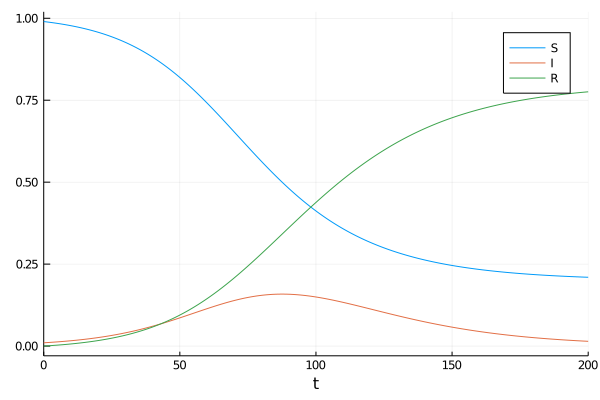

In [14]:
plot(solution, label=["S" "I" "R"])  # row vector of labels

In [15]:
using Interact

In [16]:
S₀ = 0.99   # write subscript 0 as S\_0<TAB>
I₀ = 0.01
R₀ = 0.0

initial_values = [S₀, I₀, R₀]

t_span = [0.0, 200.0]  # initial and final time

2-element Array{Float64,1}:
   0.0
 200.0

In [38]:
r = 0.0:0.001:2.0

@manipulate for β in r, γ in r, T in 0:1:500.0
    
    parameters = [β, γ]
    
    t_span = [0, T]

    # set up problem:
    problem = ODEProblem(sir_ode!, initial_values, t_span, parameters)

    # solve problem:
    solution = solve(problem, saveat = 0.1) 

    
    plot(solution, label=["S" "I" "R"])  # row vector of labels
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["β"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 2001,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
1001, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/dpsanders/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/dpsanders/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/dpsanders/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/Users/dpsanders/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/Users/dpsanders/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000011170df90, Task (runnable) @0x000000011170df90), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"0.001\",\"0.002\",\"0.003\",\"0.004\",\"0.005\",\"0.006\",\"0.007\",\"0.008\",\"0.009\",\"0.01\",\"0.011\",\"0.012\",\"0.013\",\"0.014\",\"0.015\",\"0.016\",\"0.017\",\"0.018\",\"0.019\",\"0.02\",\"0.021\",\"0.022\",

The ODE integrator gives as output objects which behave like *functions*, by interpolating the points.

In [18]:
t = 3.1
solution(t)  # returns the vector of all variables at the given time

3-element Array{Float64,1}:
 0.9866917515035839
 0.01163461798104764
 0.001673630515368449

## Calculating with uncertainties

People have created many surprising packages in Julia. For example, `Measurements.jl` allows us to calculate with **numbers with uncertainties**:

In [34]:
using Measurements

In [35]:
x = 0.1 ± 0.01

0.1 ± 0.01

In [36]:
typeof(x)

Measurement{Float64}

We can think of this as saying "we are uncertain about the value of $x$: it is somewhere in the range (interval) $[0.1 - 0.01, 0.1 + 0.01]$"

Any measurement of a real physical, biological, economic etc. system has an uncertainty like this.

## SIR model with uncertainty

One of the amazing things about Julia is the way different packages can be used together: we call this **composability**. 

For example, can we solve an SIR model with uncertainty?

In order to do so, the packages must be written in such a way that they **do not assume anything (or much) about the *types* of their inputs**. 

In [37]:
β = 0.1 ± 0.01
γ = 0.05 ± 0.01

parameters = [β, γ]

S₀ = 0.99   # write subscript 0 as S\_0<TAB>
I₀ = 0.01
R₀ = 0.0

initial_values = [S₀, I₀, R₀]

t_span = [0.0, 200.0]  # initial and final time

# set up problem:
problem = ODEProblem(sir_ode!, initial_values, t_span, parameters)

# solve problem:
solution = solve(problem, saveat = 1.0);

In [ ]:
plot(solution, alpha=0.5, label=["S" "I" "R"])

## Our own measurements type